In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
basemap = cx.providers.CartoDB.VoyagerNoLabels

In [2]:
pth = os.path.join('..', 'data', 'RevelioLabs_LocationSample_Nov22.csv')
df = pd.read_csv(pth, index_col = 0); df

,city,state,country,latitude,longitude,population,msa
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...
1,seven hills,ohio,united states,41.39533,-81.67624,11690,NaN
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,WV NONMETROPOLITAN AREA
3,sint anthonis,north brabant,netherlands,51.62667,5.88194,3340,NaN
4,machali,o higgins region,chile,-34.18082,-70.64933,27595,NaN
...,...,...,...,...,...,...,...
32094,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA
32095,belfast,maine,united states,44.42591,-69.00642,6682,ME NONMETROPOLITAN AREA
32096,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA
32097,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA


In [3]:
# clean up msa labels
df.loc[df.msa.isna(), 'msa'] = 'None'
df.loc[df.msa.str.contains('NONMETROPOLITAN'), 'msa'] = 'None'
df['msa'] = df.msa.replace('None', pd.NA).astype('string')

In [4]:
# remove low-population outliers
df = df.loc[df.population > 10]; df

,city,state,country,latitude,longitude,population,msa
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...
1,seven hills,ohio,united states,41.39533,-81.67624,11690,<NA>
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,<NA>
3,sint anthonis,north brabant,netherlands,51.62667,5.88194,3340,<NA>
4,machali,o higgins region,chile,-34.18082,-70.64933,27595,<NA>
...,...,...,...,...,...,...,...
32094,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA
32095,belfast,maine,united states,44.42591,-69.00642,6682,<NA>
32096,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA
32097,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA


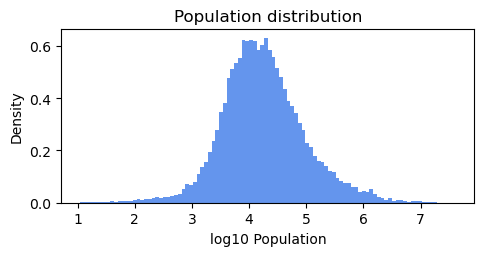

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (5.33, 2.25))
ax.hist(np.log10(df.population),
        bins = 100,
        facecolor = 'cornflowerblue',
        density = True)
plt.title('Population distribution')
plt.xlabel('log10 Population')
plt.ylabel('Density')
plt.show()

In [6]:
# geodetic coordinates (lat/lon) -> web mercator projection (for plotting)
points = gpd.points_from_xy(df.longitude, df.latitude, crs = 'EPSG:4326')
gdf = gpd.GeoDataFrame(df, geometry = points).to_crs(epsg = 3857); gdf

,city,state,country,latitude,longitude,population,msa,geometry
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...,POINT (-8207971.222 5067414.863)
1,seven hills,ohio,united states,41.39533,-81.67624,11690,<NA>,POINT (-9092157.447 5070828.79)
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,<NA>,POINT (-9001026.859 4814418.565)
3,sint anthonis,north brabant,netherlands,51.62667,5.88194,3340,<NA>,POINT (654774.566 6732902.058)
4,machali,o higgins region,chile,-34.18082,-70.64933,27595,<NA>,POINT (-7864647.44 -4053107.653)
...,...,...,...,...,...,...,...,...
32094,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA,POINT (-10813762.352 3837467.237)
32095,belfast,maine,united states,44.42591,-69.00642,6682,<NA>,POINT (-7681759.536 5531591.056)
32096,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA,POINT (-9334258.415 5321578.2)
32097,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA,POINT (-9369783.804 4003071.597)


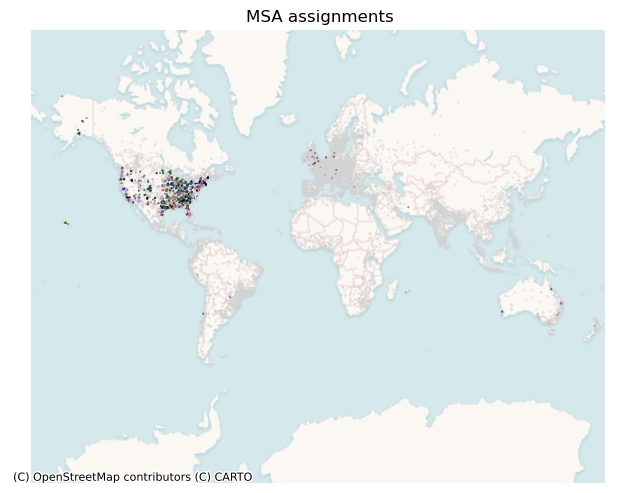

In [ ]:
ms = .1
na_dict = {'color' : 'lightgrey', 
           'markersize' : ms, 
           'zorder' : 10}

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
gdf.plot(column = 'msa', 
         cmap = 'cubehelix', 
         markersize = ms, 
         zorder = 100,
         missing_kwds = na_dict,
         ax = ax)
cx.add_basemap(ax, source = basemap, zorder = 0)
ax.set_title('MSA assignments')
ax.axis(False)
plt.show()

In [ ]:
# split US vs. international cities
us_msk = gdf.country.isin(['united states'])
gdf_us = gdf.loc[us_msk].copy()     # training/dev
gdf_intl = gdf.loc[~us_msk].copy()  # testing

In [9]:
gdf_us

,city,state,country,latitude,longitude,population,msa,geometry
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...,POINT (-8207971.222 5067414.863)
1,seven hills,ohio,united states,41.39533,-81.67624,11690,<NA>,POINT (-9092157.447 5070828.79)
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,<NA>,POINT (-9001026.859 4814418.565)
7,jacksonville,oregon,united states,42.31346,-122.96699,2883,Jacksonville FL MSA,POINT (-13688622.711 5208050.499)
15,tigerville,south carolina,united states,35.06845,-82.36845,1312,Greenville-Mauldin-Easley SC MSA,POINT (-9169213.911 4173187.121)
...,...,...,...,...,...,...,...,...
32094,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA,POINT (-10813762.352 3837467.237)
32095,belfast,maine,united states,44.42591,-69.00642,6682,<NA>,POINT (-7681759.536 5531591.056)
32096,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA,POINT (-9334258.415 5321578.2)
32097,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA,POINT (-9369783.804 4003071.597)


In [10]:
gdf_intl

,city,state,country,latitude,longitude,population,msa,geometry
3,sint anthonis,north brabant,netherlands,51.62667,5.88194,3340,<NA>,POINT (654774.566 6732902.058)
4,machali,o higgins region,chile,-34.18082,-70.64933,27595,<NA>,POINT (-7864647.44 -4053107.653)
6,jankowice,silesia,poland,50.00090,18.98901,2840,<NA>,POINT (2113846.924 6446431.707)
8,fjerritslev,north denmark,denmark,57.08822,9.26622,3332,<NA>,POINT (1031510.892 7778171.492)
9,palmanova,balearic islands,spain,39.52470,2.53922,7040,<NA>,POINT (282664.677 4797111.472)
...,...,...,...,...,...,...,...,...
31898,cacoal,rondonia,brazil,-11.43861,-61.44722,55560,<NA>,POINT (-6840273.241 -1281884.032)
31899,moulins,auvergne rhone alpes,france,46.56459,3.33243,23095,<NA>,POINT (370964.411 5871291.422)
31903,wymondham,england,united kingdom,52.75978,-0.74055,500,<NA>,POINT (-82437.649 6938686.748)
31904,ubud,bali,indonesia,-8.50980,115.26540,28373,<NA>,POINT (12831285.634 -950808.768)


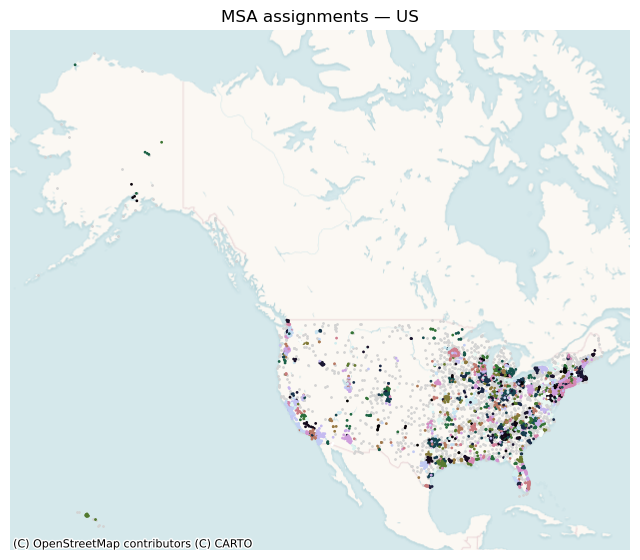

In [ ]:
ms = 1.
na_dict['markersize'] = ms

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
gdf_us.plot(column = 'msa',
            cmap = 'cubehelix',
            markersize = ms,
            zorder = 100,
            missing_kwds = na_dict,
            ax = ax)
cx.add_basemap(ax, source = basemap, zorder = 0)
ax.set_title('MSA assignments — US')
ax.axis(False)
plt.show()

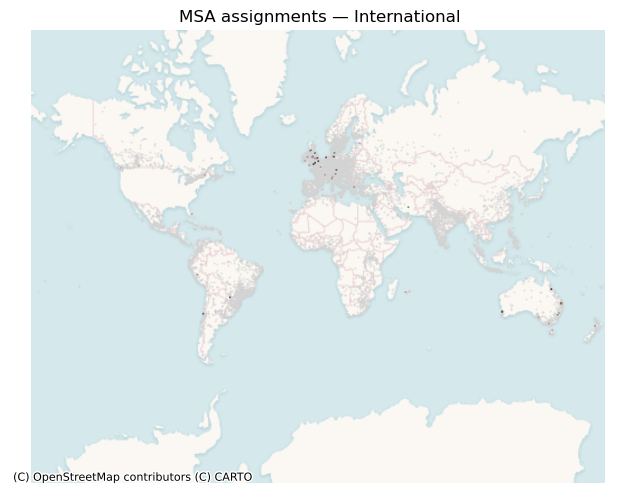

In [ ]:
ms = .1
na_dict['markersize'] = ms

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
gdf_intl.plot(column = 'msa',
              cmap = 'cubehelix',
              markersize = ms,
              zorder = 100,
              missing_kwds = na_dict,
              ax = ax)
cx.add_basemap(ax, source = basemap, zorder = 0)
ax.set_title('MSA assignments — International')
ax.axis(False)
plt.show()

In [ ]:
# two folds for unsupervised model selection
np.random.seed(42)
gdf_us['fold'] = np.random.choice([1, 2], size = gdf_us.shape[0])

In [14]:
# save data
gdf_us.to_file(os.path.join('..', 'data', 'training_us.gpkg'), driver = 'GPKG')
gdf_intl.to_file(os.path.join('..', 'data', 'testing_intl.gpkg'), driver = 'GPKG')